# Not So Queen's Gambit ♚

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import time
from datetime import datetime

In [2]:
# To set a random seed so that there is a same initialization every time
np.random.seed(1773)

# To read the csv file
chess_data = open('games.csv')
data = pd.read_csv(chess_data)

# To view the sample data
data.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
# To view the features present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
id                20058 non-null object
rated             20058 non-null bool
created_at        20058 non-null float64
last_move_at      20058 non-null float64
turns             20058 non-null int64
victory_status    20058 non-null object
winner            20058 non-null object
increment_code    20058 non-null object
white_id          20058 non-null object
white_rating      20058 non-null int64
black_id          20058 non-null object
black_rating      20058 non-null int64
moves             20058 non-null object
opening_eco       20058 non-null object
opening_name      20058 non-null object
opening_ply       20058 non-null int64
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
# To remove the presence of NaN values in the dataset
clean_data = data.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20058 entries, 0 to 20057
Data columns (total 16 columns):
id                20058 non-null object
rated             20058 non-null bool
created_at        20058 non-null float64
last_move_at      20058 non-null float64
turns             20058 non-null int64
victory_status    20058 non-null object
winner            20058 non-null object
increment_code    20058 non-null object
white_id          20058 non-null object
white_rating      20058 non-null int64
black_id          20058 non-null object
black_rating      20058 non-null int64
moves             20058 non-null object
opening_eco       20058 non-null object
opening_name      20058 non-null object
opening_ply       20058 non-null int64
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.5+ MB


# **Analysis of position the king has mated at the end**

In [5]:
# First the games that has been ended by check-mate has to be found
# This is found using the 'victory_status' feature

mate_data = pd.DataFrame()
for i in range(len(clean_data)):
  game = clean_data.iloc[i]
  if game['victory_status'] == 'mate':
      mate_data = mate_data.append(game)

# Viewing the new dataset where the games where ended only by check-mate
mate_data.head(2)

,black_id,black_rating,created_at,id,increment_code,last_move_at,moves,opening_eco,opening_name,opening_ply,rated,turns,victory_status,white_id,white_rating,winner
2,a-00,1500.0,1.504130e+12,mIICvQHh,5+10,1.504130e+12,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3.0,1.0,61.0,mate,ischia,1496.0,white
3,adivanov2009,1454.0,1.504110e+12,kWKvrqYL,20+0,1.504110e+12,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3.0,1.0,61.0,mate,daniamurashov,1439.0,white


In [6]:
# Splitting the mate data into three levels as beginners, intermediate and advance

beginner = pd.DataFrame()
intermediate = pd.DataFrame()
advance = pd.DataFrame()
for i in range(len(mate_data)):
  game = mate_data.iloc[i]
  min_rating = min(game['black_rating'],game['white_rating'])
  if min_rating <= 1400:
    beginner = beginner.append(game)
  elif (min_rating <= 1800) & (min_rating >1400):
    intermediate = intermediate.append(game)
  elif min_rating > 1800:
    advance = advance.append(game)


In [7]:
# Sample data structure of the three different dictionaries created
print(beginner.iloc[1])

black_id                                                   anaissac
black_rating                                                   1272
created_at                                              1.50335e+12
id                                                         HgKLWPsz
increment_code                                                20+60
last_move_at                                            1.50335e+12
moves             e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...
opening_eco                                                     A00
opening_name                                   Van't Kruijs Opening
opening_ply                                                       1
rated                                                             0
turns                                                            39
victory_status                                                 mate
white_id                                         daniel_likes_chess
white_rating                                    

In [8]:
# Finding the position of king in beginners

k_pos_beginner = {'a':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'b':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'c':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'd':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'e':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'f':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'g':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'h':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0}}
positions = {'a','b','c','d','e','f','g','h'}
for i in range(len(beginner)):
  moves = beginner.iloc[i]['moves'].split()
  # print(moves)
  if 'K' in moves[len(moves)-2]:
    k_position = moves[len(moves)-2].split('K')[1]
    vals = list(map(str,k_position))
    if vals[0] in positions:
      k_pos_beginner[vals[0]][vals[1]] +=1
    else:
      k_pos_beginner[vals[1]][vals[2]] +=1

# Printing the position of the king in beginner level
k_pos_beginner

{'a': {'1': 32, '2': 23, '3': 29, '4': 24, '5': 38, '6': 25, '7': 7, '8': 27},
 'b': {'1': 20, '2': 6, '3': 2, '4': 11, '5': 8, '6': 11, '7': 3, '8': 17},
 'c': {'1': 22, '2': 4, '3': 4, '4': 9, '5': 4, '6': 3, '7': 9, '8': 28},
 'd': {'1': 31, '2': 11, '3': 14, '4': 8, '5': 5, '6': 13, '7': 13, '8': 56},
 'e': {'1': 38, '2': 11, '3': 13, '4': 16, '5': 7, '6': 13, '7': 19, '8': 58},
 'f': {'1': 49, '2': 9, '3': 15, '4': 11, '5': 11, '6': 13, '7': 14, '8': 64},
 'g': {'1': 49, '2': 12, '3': 5, '4': 18, '5': 8, '6': 8, '7': 14, '8': 36},
 'h': {'1': 63, '2': 21, '3': 38, '4': 34, '5': 33, '6': 37, '7': 29, '8': 55}}

In [9]:
# Finding the position of king in intermediate

k_pos_intermediate = {'a':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'b':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'c':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'd':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'e':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'f':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'g':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'h':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0}}
positions = {'a','b','c','d','e','f','g','h'}
for i in range(len(intermediate)):
  moves = intermediate.iloc[i]['moves'].split()
  # print(moves)
  if 'K' in moves[len(moves)-2]:
    k_position = moves[len(moves)-2].split('K')[1]
    vals = list(map(str,k_position))
    if vals[0] in positions:
      k_pos_intermediate[vals[0]][vals[1]] +=1
    else:
      k_pos_intermediate[vals[1]][vals[2]] +=1

# Printing the position of the king in intermediate level
k_pos_intermediate

{'a': {'1': 17, '2': 14, '3': 17, '4': 28, '5': 20, '6': 20, '7': 14, '8': 23},
 'b': {'1': 20, '2': 4, '3': 4, '4': 6, '5': 6, '6': 4, '7': 7, '8': 23},
 'c': {'1': 21, '2': 9, '3': 2, '4': 10, '5': 11, '6': 7, '7': 6, '8': 37},
 'd': {'1': 27, '2': 12, '3': 12, '4': 11, '5': 9, '6': 11, '7': 18, '8': 44},
 'e': {'1': 45, '2': 19, '3': 12, '4': 11, '5': 5, '6': 7, '7': 22, '8': 31},
 'f': {'1': 72, '2': 12, '3': 13, '4': 14, '5': 10, '6': 11, '7': 13, '8': 76},
 'g': {'1': 58, '2': 7, '3': 14, '4': 16, '5': 13, '6': 8, '7': 12, '8': 59},
 'h': {'1': 71, '2': 41, '3': 41, '4': 47, '5': 58, '6': 40, '7': 45, '8': 69}}

In [10]:
# Finding the position of king in advance

k_pos_advance = {'a':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'b':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'c':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'd':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'e':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'f':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'g':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0},
              'h':{'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0}}
positions = {'a','b','c','d','e','f','g','h'}
for i in range(len(advance)):
  moves = advance.iloc[i]['moves'].split()
  # print(moves)
  if 'K' in moves[len(moves)-2]:
    k_position = moves[len(moves)-2].split('K')[1]
    vals = list(map(str,k_position))
    if vals[0] in positions:
      k_pos_advance[vals[0]][vals[1]] +=1
    else:
      k_pos_advance[vals[1]][vals[2]] +=1

# Printing the position of the king in advance level
k_pos_advance

{'a': {'1': 9, '2': 3, '3': 2, '4': 2, '5': 3, '6': 4, '7': 3, '8': 7},
 'b': {'1': 3, '2': 1, '3': 0, '4': 0, '5': 2, '6': 2, '7': 1, '8': 3},
 'c': {'1': 9, '2': 1, '3': 2, '4': 0, '5': 0, '6': 2, '7': 1, '8': 2},
 'd': {'1': 7, '2': 2, '3': 1, '4': 2, '5': 1, '6': 3, '7': 4, '8': 7},
 'e': {'1': 5, '2': 4, '3': 2, '4': 0, '5': 4, '6': 3, '7': 2, '8': 10},
 'f': {'1': 4, '2': 2, '3': 2, '4': 5, '5': 2, '6': 5, '7': 2, '8': 12},
 'g': {'1': 16, '2': 3, '3': 8, '4': 5, '5': 4, '6': 0, '7': 8, '8': 11},
 'h': {'1': 22, '2': 8, '3': 7, '4': 6, '5': 4, '6': 10, '7': 3, '8': 19}}

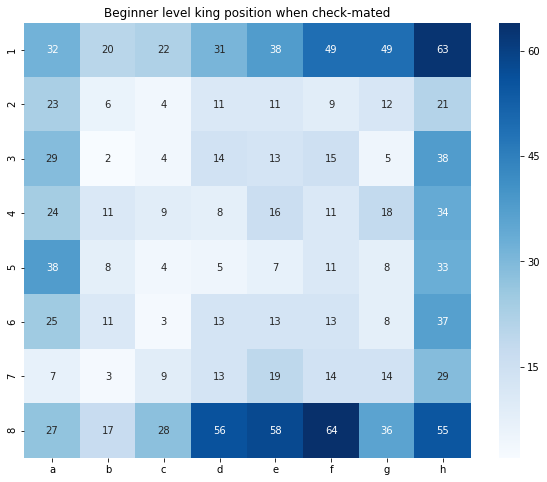

In [11]:
# Visualizing the beginner level king position when mated
beginner_df = pd.DataFrame(k_pos_beginner)
fig,ax = plt.subplots(figsize = (10,8))
sns.heatmap(beginner_df, cmap = 'Blues', annot = True, ax=ax)
plt.title('Beginner level king position when check-mated')
plt.show()

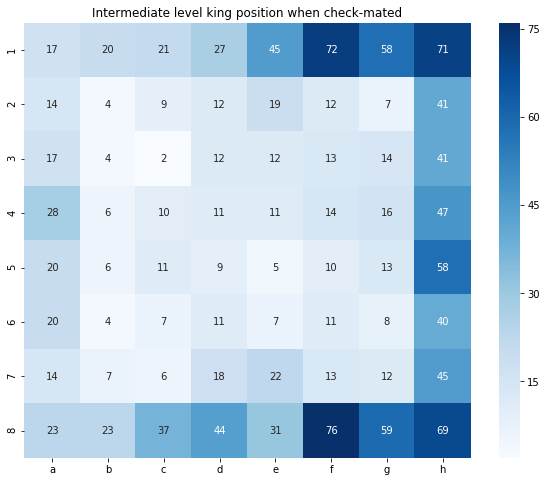

In [12]:
# Visualizing the intermediate level king position when mated
intermediate_df = pd.DataFrame(k_pos_intermediate)
fig,ax = plt.subplots(figsize = (10,8))
sns.heatmap(intermediate_df, cmap = 'Blues', annot = True, ax=ax)
plt.title('Intermediate level king position when check-mated')
plt.show()

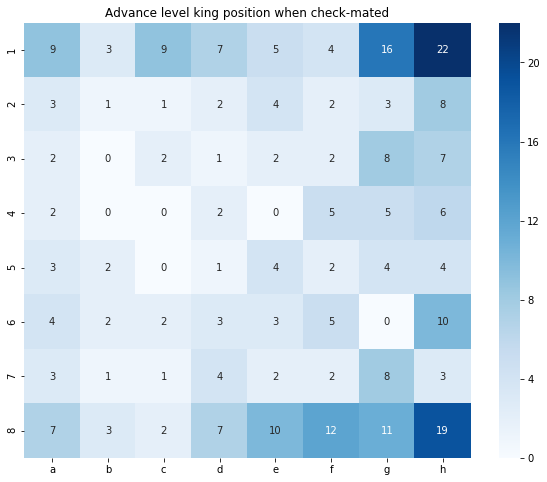

In [13]:
# Visualizing the advance level king position when mated
advance_df = pd.DataFrame(k_pos_advance)
fig,ax = plt.subplots(figsize = (10,8))
sns.heatmap(advance_df, cmap = 'Blues', annot = True, ax=ax)
plt.title('Advance level king position when check-mated')
plt.show()

# **Piece that check-mated the King most of the times**

In [14]:
pieces_list = {'a':0,'b':0,'c':0,'d':0,'e':0,'f':0,'g':0,'h':0,'Q':0,'B':0,'N':0,'R':0,'K':0}
for i in range(len(mate_data)):
  moves = mate_data.iloc[i]['moves'].split()
  # print(moves)
  mate_position = moves[len(moves)-1]
  piece = list(map(str,mate_position))
  # print(piece)
  pieces_list[piece[0]] += 1

pieces_list

{'a': 26,
 'b': 18,
 'c': 19,
 'd': 20,
 'e': 21,
 'f': 27,
 'g': 51,
 'h': 39,
 'Q': 3984,
 'B': 273,
 'N': 227,
 'R': 1617,
 'K': 3}

# **Castling** ♜♚

In [15]:
# Finding queen-side and king-side castling

# O-O-O refer to Queen side (Long) castling while O-O refer to King Side (Short)

castling = {'Q':{'beginner':0,'intermediate':0,'advance':0},
            'K':{'beginner':0,'intermediate':0,'advance':0}}

for i in range(len(clean_data)):
  game = clean_data.iloc[i]
  if 'O-O-O' in game['moves']:
    min_rating = min(game['black_rating'],game['white_rating'])
    if min_rating <= 1400:
      castling['Q']['beginner'] += 1
    elif (min_rating <= 1800) & (min_rating >1400):
      castling['Q']['intermediate'] += 1
    elif min_rating > 1800:
      castling['Q']['advance'] += 1
  if 'O-O' in game['moves']:
    min_rating = min(game['black_rating'],game['white_rating'])
    if min_rating <= 1400:
      castling['K']['beginner'] += 1
    elif (min_rating <= 1800) & (min_rating >1400):
      castling['K']['intermediate'] += 1
    elif min_rating > 1800:
      castling['K']['advance'] += 1

# Printing the castling counts for each level
castling

{'Q': {'beginner': 1288, 'intermediate': 1789, 'advance': 466},
 'K': {'beginner': 5210, 'intermediate': 8423, 'advance': 2892}}

In [16]:
# Splitting the original data into three levels as beginners, intermediate and advance
beginner_data = pd.DataFrame()
intermediate_data = pd.DataFrame()
advance_data = pd.DataFrame()
for i in range(len(clean_data)):
  game = clean_data.iloc[i]
  min_rating = min(game['black_rating'],game['white_rating'])
  if min_rating <= 1400:
    beginner_data = beginner_data.append(game)
  elif (min_rating <= 1800) & (min_rating >1400):
    intermediate_data = intermediate_data.append(game)
  elif min_rating > 1800:
    advance_data = advance_data.append(game)


In [17]:
# Queen side castling position with its count for three levels

begin_pos = dict()
# Finding the position of castling beginner
for i in range(len(beginner_data)):
  game = beginner_data.iloc[i]
  if 'O-O-O' in game['moves']:
    moves = game['moves'].split()
    # print(moves)
    try:
      position = moves.index('O-O-O')
    except:
      position = moves.index('O-O-O+')
    if position in begin_pos.keys():
      begin_pos[position] += 1
    else:
      begin_pos[position] = 1

inter_pos = dict()     
# Finding the position of castling intermediate
for i in range(len(intermediate_data)):
  game = intermediate_data.iloc[i]
  if 'O-O-O' in game['moves']:
    moves = game['moves'].split()
    # print(moves)
    try:
      position = moves.index('O-O-O')
    except:
      position = moves.index('O-O-O+')
    if position in inter_pos.keys():
      inter_pos[position] += 1
    else:
      inter_pos[position] = 1

advance_pos = dict()     
# Finding the position of castling advance
for i in range(len(advance_data)):
  game = advance_data.iloc[i]
  if 'O-O-O' in game['moves']:
    moves = game['moves'].split()
    # print(moves)
    try:
      position = moves.index('O-O-O')
    except:
      position = moves.index('O-O-O+')
    if position in advance_pos.keys():
      advance_pos[position] += 1
    else:
      advance_pos[position] = 1


# Sorting the keys of the dictionaries created
begin_pos = collections.OrderedDict(sorted(begin_pos.items()))
inter_pos = collections.OrderedDict(sorted(inter_pos.items())) 
advance_pos = collections.OrderedDict(sorted(advance_pos.items())) 

# Printing the move number and its castling count 
print('Beginner Q-castling positions list',begin_pos)
print('Intermediate Q-castlng positions list',inter_pos)
print('Advance Q-castling positions list',advance_pos)

Beginner Q-castling positions list OrderedDict([(9, 3), (10, 5), (11, 10), (12, 14), (13, 28), (14, 39), (15, 50), (16, 46), (17, 62), (18, 58), (19, 51), (20, 61), (21, 66), (22, 55), (23, 69), (24, 55), (25, 63), (26, 52), (27, 57), (28, 45), (29, 31), (30, 44), (31, 39), (32, 36), (33, 28), (34, 24), (35, 28), (36, 26), (37, 20), (38, 18), (39, 13), (40, 14), (41, 18), (42, 7), (43, 8), (44, 4), (45, 3), (46, 7), (47, 9), (48, 2), (49, 5), (50, 2), (51, 1), (54, 1), (56, 3), (57, 3), (59, 1), (60, 1), (61, 1), (63, 2)])
Intermediate Q-castlng positions list OrderedDict([(9, 2), (10, 7), (11, 12), (12, 20), (13, 30), (14, 71), (15, 43), (16, 83), (17, 73), (18, 118), (19, 70), (20, 94), (21, 70), (22, 99), (23, 73), (24, 114), (25, 73), (26, 78), (27, 71), (28, 73), (29, 66), (30, 54), (31, 46), (32, 29), (33, 37), (34, 47), (35, 38), (36, 30), (37, 24), (38, 16), (39, 14), (40, 16), (41, 11), (42, 18), (43, 10), (44, 12), (45, 9), (46, 5), (47, 5), (48, 4), (49, 3), (50, 3), (52, 2)

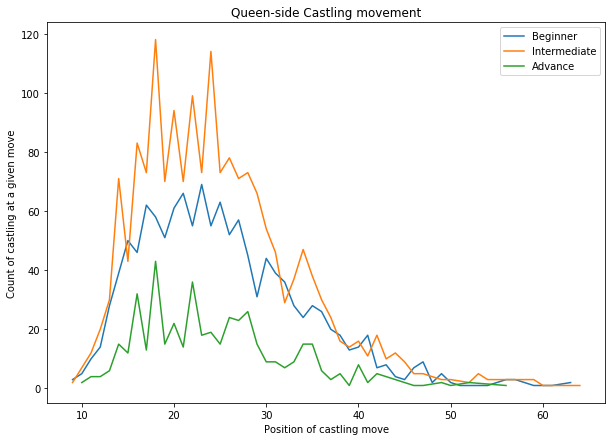

In [18]:
# Plotting castlings at different levels in a single graph

begin_keys = list(begin_pos.keys())
begin_vals = list(begin_pos.values())
inter_keys = list(inter_pos.keys())
inter_vals = list(inter_pos.values())
advance_keys = list(advance_pos.keys())
advance_vals = list(advance_pos.values())
plt.figure(figsize=(10,7))
plt.plot(begin_keys,begin_vals)
plt.plot(inter_keys,inter_vals)
plt.plot(advance_keys,advance_vals)
plt.legend(['Beginner', 'Intermediate', 'Advance'], loc='upper right')
plt.title('Queen-side Castling movement')
plt.xlabel('Position of castling move')
plt.ylabel('Count of castling at a given move')
plt.show()

In [19]:
# King side castling position with its count for three levels

begin_pos = dict()
# Finding the position of castling beginner
for i in range(len(beginner_data)):
  game = beginner_data.iloc[i]
  if 'O-O' in game['moves']:
    moves = game['moves'].split()
    # print(moves)
    try:
      position = moves.index('O-O')
    except:
      continue
    if position in begin_pos.keys():
      begin_pos[position] += 1
    else:
      begin_pos[position] = 1

inter_pos = dict()     
# Finding the position of castling intermediate
for i in range(len(intermediate_data)):
  game = intermediate_data.iloc[i]
  if 'O-O' in game['moves']:
    moves = game['moves'].split()
    # print(moves)
    try:
      position = moves.index('O-O')
    except:
      continue
    if position in inter_pos.keys():
      inter_pos[position] += 1
    else:
      inter_pos[position] = 1

advance_pos = dict()     
# Finding the position of castling advance
for i in range(len(advance_data)):
  game = advance_data.iloc[i]
  if 'O-O' in game['moves']:
    moves = game['moves'].split()
    # print(moves)
    try:
      position = moves.index('O-O')
    except:
      continue
    if position in advance_pos.keys():
      advance_pos[position] += 1
    else:
      advance_pos[position] = 1

# Sorting the keys of the dictionaries created
begin_pos = collections.OrderedDict(sorted(begin_pos.items()))
inter_pos = collections.OrderedDict(sorted(inter_pos.items())) 
advance_pos = collections.OrderedDict(sorted(advance_pos.items())) 

# Printing the move number and its castling count 

print('Beginner K-castling positions list',begin_pos)
print('Intermediate K-castlng positions list',inter_pos)
print('Advance K-castling positions list',advance_pos)

Beginner K-castling positions list OrderedDict([(6, 217), (7, 83), (8, 284), (9, 211), (10, 282), (11, 189), (12, 312), (13, 222), (14, 321), (15, 190), (16, 279), (17, 179), (18, 223), (19, 136), (20, 182), (21, 141), (22, 135), (23, 121), (24, 125), (25, 82), (26, 85), (27, 64), (28, 77), (29, 69), (30, 53), (31, 46), (32, 40), (33, 31), (34, 42), (35, 22), (36, 23), (37, 22), (38, 13), (39, 14), (40, 17), (41, 11), (42, 11), (43, 9), (44, 19), (45, 10), (46, 3), (47, 6), (48, 6), (49, 2), (50, 5), (51, 4), (52, 4), (53, 7), (54, 1), (55, 2), (57, 1), (58, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (69, 1), (81, 1)])
Intermediate K-castlng positions list OrderedDict([(6, 330), (7, 143), (8, 442), (9, 405), (10, 461), (11, 399), (12, 667), (13, 439), (14, 573), (15, 394), (16, 466), (17, 319), (18, 372), (19, 246), (20, 287), (21, 220), (22, 212), (23, 161), (24, 159), (25, 120), (26, 149), (27, 106), (28, 103), (29, 88), (30, 93), (31, 54), (32, 67), (33, 46), (34, 35), (35, 37

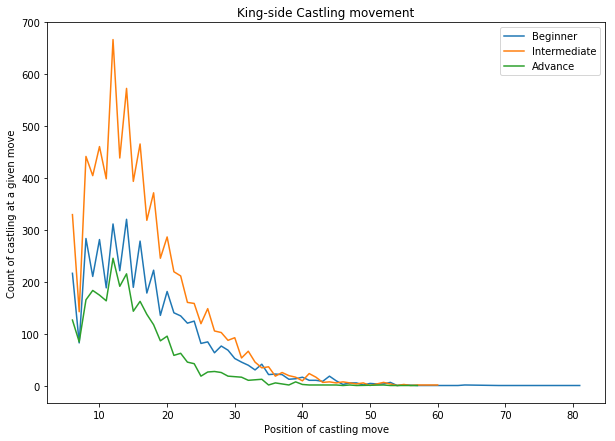

In [20]:
# Plotting castlings at different levels in a single graph

begin_keys = list(begin_pos.keys())
begin_vals = list(begin_pos.values())
inter_keys = list(inter_pos.keys())
inter_vals = list(inter_pos.values())
advance_keys = list(advance_pos.keys())
advance_vals = list(advance_pos.values())
plt.figure(figsize=(10,7))
plt.plot(begin_keys,begin_vals)
plt.plot(inter_keys,inter_vals)
plt.plot(advance_keys,advance_vals)
plt.legend(['Beginner', 'Intermediate', 'Advance'], loc='upper right')
plt.title('King-side Castling movement')
plt.xlabel('Position of castling move')
plt.ylabel('Count of castling at a given move')
plt.show()

# Deeper Insights ♔


<h3>o Average distance travelled by king in a game for different level matches<br><br>
o Average Movement of King without Check for different level matches<br><br>
o Piece that gives maximum checks <br><br>
o Piece that defends the king the most while on check <br> </h3>

In [26]:
#this part will give more spotlight to the king and provide deeper insights on the game 

l = []
c=0
game_type = {"begineer": 0, "advanced": 0 , "intermediate": 0 }
king_dist = {"begineer": 0, "advanced": 0 , "intermediate": 0 }
move_king_without_check =  {"begineer": 0, "advanced": 0 , "intermediate": 0 }
castling = {"king_side": 0, "queen_side": 0}
give_check = {}

for moves in data['moves']:
    
    cnt = 0
    move_count=0
    movement_without_check = 0
    king_defended_without_moving=0;
    
    for move in moves.split():
        
        xy = moves.split()
        # ''+'' refer to giving a check, we will find the peice that gave check 
        if move[-1] == "+" :
            
            if move[0] in give_check:
                give_check[move[0]] += 1
            else:
                give_check[move[0]] = 1
            
            if move_count+1 < len(xy) and xy[move_count+1][0] != "K":
                #king was not moved but a piece was placed to defend it
                l.append(xy[move_count+1][0])
                king_defended_without_moving+=1;
                
        #the king travels two steps when castled          
        if move == "O-O" or move == "O-O-O":
            cnt+=2  
        
        elif move[0:1] == "K":  
            if xy[move_count-1][-1] != "+":
                #not a check
                movement_without_check+=1
            
            cnt+=1
        move_count+=1;

    min_rating = min(data['white_rating'][c], data['black_rating'][c])
    
    if min_rating <=1400:
        game_type["begineer"]+=1
        king_dist["begineer"]+=cnt
        move_king_without_check["begineer"]+=movement_without_check
        
    elif min_rating > 1800:
        game_type["advanced"]+=1
        king_dist["advanced"]+=cnt
        move_king_without_check["advanced"]+=movement_without_check
        
    else:
        game_type["intermediate"]+=1
        king_dist["intermediate"]+=cnt
        move_king_without_check["intermediate"]+=movement_without_check
        
    c+=1
    

#Piece which defended the maximum checks

m = {}
for i in range(len(l)):
    if l[i] in m:
        m[l[i]] += 1
    else:
        m[l[i]] = 1

        
print("Piece that defends the king the most while on check:")
print(sorted(m.items(), key=lambda item: item[1]))  

print("\n")

#piece that gives maximum checks
print("Piece that contributes to maximum checks:")
print(sorted(give_check.items(), key=lambda item: item[1]))

print("\n")

print("Average distance travelled by king (in blocks) in a game:")
print("Begineer :" , round(king_dist["begineer"]/game_type["begineer"]))
print("Intermediate: " , round(king_dist["intermediate"]/game_type["intermediate"]))
print("Advanced :", round(king_dist["advanced"]/game_type["advanced"]))

print("\nAverage Movement of King on the board without Check:")
print("Begineer :" , round(move_king_without_check["begineer"]/game_type["begineer"]))
print("Intermediate: " , round(move_king_without_check["intermediate"]/game_type["intermediate"]))
print("Advanced :", round(move_king_without_check["advanced"]/game_type["advanced"]))

Piece that defends the king the most while on check:
[('a', 109), ('e', 210), ('d', 244), ('h', 266), ('f', 792), ('b', 1411), ('c', 1502), ('g', 1605), ('N', 5004), ('R', 5267), ('Q', 5685), ('B', 6352)]


Piece that contributes to maximum checks:
[('O', 109), ('K', 113), ('a', 338), ('b', 507), ('c', 635), ('d', 713), ('h', 788), ('e', 995), ('f', 1110), ('g', 1137), ('N', 14464), ('B', 14672), ('R', 25578), ('Q', 34192)]


Average distance travelled by king (in blocks) in a game:
Begineer : 8
Intermediate:  10
Advanced : 11

Average Movement of King on the board without Check:
Begineer : 2
Intermediate:  4
Advanced : 5


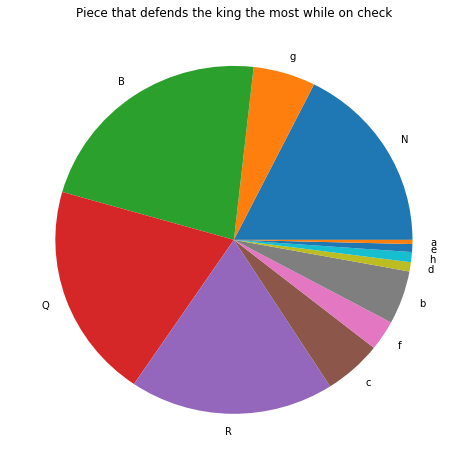

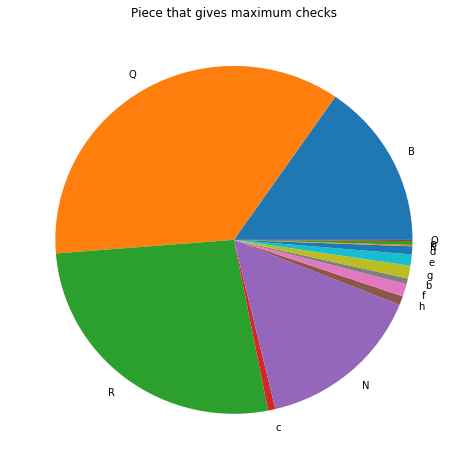

In [27]:
# Get the Keys and store them in a list
labels = list(m.keys())

# Get the Values and store them in a list
values = list(m.values())
plt.figure(figsize=(8,8))
plt.title('Piece that defends the king the most while on check', fontsize=12) 
plt.pie(values, labels=labels)
plt.show()


# Get the Keys and store them in a list
labelss = list(give_check.keys())

# Get the Values and store them in a list

valuess = list(give_check.values())
plt.figure(figsize=(8,8))
plt.title('Piece that gives maximum checks', fontsize=12) 
plt.pie(valuess, labels=labelss)
plt.show()